In [4]:
import pandas as pd

# Load CSV files
stardist_df = pd.read_csv('stardistHE_tau_results.csv')
cellpose_df = pd.read_csv('cellpose_HE_tau_results.csv')
hovernet_df = pd.read_csv('hovernet_results.csv')
instaseg_df = pd.read_csv('instanseg_evaluation_results.csv')

In [7]:
# Example: Extract metrics and metric names
metric_names = ['precision', 'recall', 'f1','accuracy','fp','tp','fn']  # Adjust based on your CSV structure
taus = stardist_df['tau'].tolist()  # Assuming a column for IoU thresholds

# Extract metrics for each model
stardist_metrics = [stardist_df[metric].tolist() for metric in metric_names]
cellpose_metrics = [cellpose_df[metric].tolist() for metric in metric_names]
hovernet_metrics = [hovernet_df[metric].tolist() for metric in metric_names]
instaseg_metrics = [instaseg_df[metric].tolist() for metric in metric_names]

In [22]:
import pandas as pd
import numpy as np

# Load CSV files
stardist_df = pd.read_csv('stardistHE_tau_results.csv')
cellpose_df = pd.read_csv('cellpose_HE_tau_results.csv')
hovernet_df = pd.read_csv('hovernet_results.csv')
instaseg_df = pd.read_csv('instanseg_evaluation_results.csv')

models = {
    'StarDist': stardist_df,
    'Cellpose': cellpose_df,
    'HoverNet': hovernet_df,
    'InstaSeg': instaseg_df
}

thresholds = np.round(np.arange(0.1, 1.0, 0.1), 1)
metrics = ['f1', 'accuracy', 'precision', 'recall', 'fp', 'fn', 'tp']

for metric in metrics:
    header_cells = " & ".join([r"\textbf{" + f"{tau:.1f}" + "}" for tau in thresholds])
    latex_table = fr"""\begin{{table}}[ht]
\centering
\caption{{{metric.upper()} values for models across IoU thresholds (0.1 to 0.9)}}
\begin{{tabular}}{{l|{"c" * len(thresholds)}}}
\hline
\textbf{{Model}} & {header_cells} \\
\hline
"""

    for model_name, df in models.items():
        row_values = [model_name]
        for tau in thresholds:
            row = df[df['tau'] == tau]
            if not row.empty:
                val = row.iloc[0][metric]
                try:
                    row_values.append(f"{val:.2f}")
                except:
                    row_values.append(str(val))
            else:
                row_values.append("-")
        latex_table += " & ".join(row_values) + r" \\" + "\n"

    latex_table += r"""\hline
\end{tabular}
\label{tab:%s-iou-thresholds}
\end{table}
""" % metric

    print(latex_table)
    print("\n" + "="*80 + "\n")


\begin{table}[ht]
\centering
\caption{F1 values for models across IoU thresholds (0.1 to 0.9)}
\begin{tabular}{l|ccccccccc}
\hline
\textbf{Model} & \textbf{0.1} & \textbf{0.2} & \textbf{0.3} & \textbf{0.4} & \textbf{0.5} & \textbf{0.6} & \textbf{0.7} & \textbf{0.8} & \textbf{0.9} \\
\hline
StarDist & 0.88 & 0.88 & 0.87 & 0.85 & 0.80 & 0.75 & 0.63 & 0.32 & 0.02 \\
Cellpose & 0.88 & 0.88 & 0.87 & 0.85 & 0.79 & 0.73 & 0.60 & 0.30 & 0.02 \\
HoverNet & 0.87 & 0.87 & 0.86 & 0.84 & 0.79 & 0.74 & 0.64 & 0.36 & 0.03 \\
InstaSeg & 0.78 & 0.77 & 0.74 & 0.70 & 0.64 & 0.58 & 0.47 & 0.23 & 0.01 \\
\hline
\end{tabular}
\label{tab:f1-iou-thresholds}
\end{table}



\begin{table}[ht]
\centering
\caption{ACCURACY values for models across IoU thresholds (0.1 to 0.9)}
\begin{tabular}{l|ccccccccc}
\hline
\textbf{Model} & \textbf{0.1} & \textbf{0.2} & \textbf{0.3} & \textbf{0.4} & \textbf{0.5} & \textbf{0.6} & \textbf{0.7} & \textbf{0.8} & \textbf{0.9} \\
\hline
StarDist & 0.78 & 0.78 & 0.77 & 0.74 & 0.67 & 

In [25]:
import pandas as pd
import numpy as np

# Load CSV files
stardist_df = pd.read_csv('stardistHE_tau_results.csv')
cellpose_df = pd.read_csv('cellpose_HE_tau_results.csv')
hovernet_df = pd.read_csv('hovernet_results.csv')
instaseg_df = pd.read_csv('instanseg_evaluation_results.csv')

models = {
    'StarDist': stardist_df,
    'Cellpose': cellpose_df,
    'HoverNet': hovernet_df,
    'InstaSeg': instaseg_df
}

thresholds = np.round(np.arange(0.1, 1.0, 0.1), 1)
metrics = ['f1', 'accuracy', 'precision', 'recall', 'fp', 'fn', 'tp']

# Number of columns per metric = number of thresholds
num_thresh = len(thresholds)

# Build header rows
metric_header = []
threshold_header = []

for metric in metrics:
    metric_header.append(r"\multicolumn{" + f"{num_thresh}" + r"}{c|}{" + metric.upper() + "}")
    threshold_header.extend([f"{tau:.1f}" for tau in thresholds])

metric_header_line = " & ".join(["\\textbf{Model}"] + metric_header) + r" \\"
threshold_header_line = " & ".join([""] + threshold_header) + r" \\"

# Start LaTeX table
latex_table = r"""\begin{table}[ht]
\centering
\caption{Model performance across IoU thresholds (0.1 to 0.9) and metrics}
\begin{tabular}{l|""" + "c" * (num_thresh * len(metrics)) + "}\n"
latex_table += r"\hline" + "\n"
latex_table += metric_header_line + "\n"
latex_table += r"\hline" + "\n"
latex_table += threshold_header_line + "\n"
latex_table += r"\hline" + "\n"

# Fill rows for each model
for model_name, df in models.items():
    row_values = [model_name]
    for metric in metrics:
        for tau in thresholds:
            row = df[df['tau'] == tau]
            if not row.empty:
                val = row.iloc[0][metric]
                try:
                    row_values.append(f"{val:.2f}")
                except:
                    row_values.append(str(val))
            else:
                row_values.append("-")
    latex_table += " & ".join(row_values) + r" \\" + "\n"

latex_table += r"""\hline
\end{tabular}
\label{tab:all_metrics_iou}
\end{table}
"""

print(latex_table)


\begin{table}[ht]
\centering
\caption{Model performance across IoU thresholds (0.1 to 0.9) and metrics}
\begin{tabular}{l|ccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccc}
\hline
\textbf{Model} & \multicolumn{9}{c|}{F1} & \multicolumn{9}{c|}{ACCURACY} & \multicolumn{9}{c|}{PRECISION} & \multicolumn{9}{c|}{RECALL} & \multicolumn{9}{c|}{FP} & \multicolumn{9}{c|}{FN} & \multicolumn{9}{c|}{TP} \\
\hline
 & 0.1 & 0.2 & 0.3 & 0.4 & 0.5 & 0.6 & 0.7 & 0.8 & 0.9 & 0.1 & 0.2 & 0.3 & 0.4 & 0.5 & 0.6 & 0.7 & 0.8 & 0.9 & 0.1 & 0.2 & 0.3 & 0.4 & 0.5 & 0.6 & 0.7 & 0.8 & 0.9 & 0.1 & 0.2 & 0.3 & 0.4 & 0.5 & 0.6 & 0.7 & 0.8 & 0.9 & 0.1 & 0.2 & 0.3 & 0.4 & 0.5 & 0.6 & 0.7 & 0.8 & 0.9 & 0.1 & 0.2 & 0.3 & 0.4 & 0.5 & 0.6 & 0.7 & 0.8 & 0.9 & 0.1 & 0.2 & 0.3 & 0.4 & 0.5 & 0.6 & 0.7 & 0.8 & 0.9 \\
\hline
StarDist & 0.88 & 0.88 & 0.87 & 0.85 & 0.80 & 0.75 & 0.63 & 0.32 & 0.02 & 0.78 & 0.78 & 0.77 & 0.74 & 0.67 & 0.60 & 0.46 & 0.19 & 0.01 & 0.86 & 0.86 & 0.85 & 0.83 & 0.78 & 0.73 & 0.62 & 0.31 & 

In [1]:
import pandas as pd
import numpy as np

# Load CSV files
stardist_df = pd.read_csv('stardistHE_tau_results.csv')
cellpose_df = pd.read_csv('cellpose_HE_tau_results.csv')
hovernet_df = pd.read_csv('hovernet_results.csv')
instaseg_df = pd.read_csv('instanseg_evaluation_results.csv')

models = {
    'StarDist': stardist_df,
    'Cellpose': cellpose_df,
    'HoverNet': hovernet_df,
    'InstaSeg': instaseg_df
}

thresholds = np.round(np.arange(0.1, 1.0, 0.1), 1)
metrics = ['f1', 'accuracy', 'precision', 'recall', 'fp', 'fn', 'tp']

num_thresh = len(thresholds)

# Build header rows
metric_header = []
threshold_header = []

for metric in metrics:
    metric_header.append(r"\multicolumn{" + f"{num_thresh}" + r"}{c|}{" + metric.upper() + "}")
    threshold_header.extend([f"{tau:.1f}" for tau in thresholds])

metric_header_line = " & ".join(["\\textbf{Model}"] + metric_header) + r" \\"
threshold_header_line = " & ".join([""] + threshold_header) + r" \\"

# Start LaTeX table with landscape and resizebox
latex_table = r"""
\begin{landscape}
\begin{table}[ht]
\centering
\caption{Model performance across IoU thresholds (0.1 to 0.9) and metrics}
{\scriptsize
\resizebox{\textwidth}{!}{
\begin{tabular}{l|""" + "c" * (num_thresh * len(metrics)) + "}\n"

latex_table += r"\hline" + "\n"
latex_table += metric_header_line + "\n"
latex_table += r"\hline" + "\n"
latex_table += threshold_header_line + "\n"
latex_table += r"\hline" + "\n"

# Fill rows for each model
for model_name, df in models.items():
    row_values = [model_name]
    for metric in metrics:
        for tau in thresholds:
            row = df[df['tau'] == tau]
            if not row.empty:
                val = row.iloc[0][metric]
                try:
                    row_values.append(f"{val:.2f}")
                except:
                    row_values.append(str(val))
            else:
                row_values.append("-")
    latex_table += " & ".join(row_values) + r" \\" + "\n"

latex_table += r"""\hline
\end{tabular}
}
}
\label{tab:all_metrics_iou}
\end{table}
\end{landscape}
"""

print(latex_table)



\begin{landscape}
\begin{table}[ht]
\centering
\caption{Model performance across IoU thresholds (0.1 to 0.9) and metrics}
{\scriptsize
\resizebox{\textwidth}{!}{
\begin{tabular}{l|ccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccc}
\hline
\textbf{Model} & \multicolumn{9}{c|}{F1} & \multicolumn{9}{c|}{ACCURACY} & \multicolumn{9}{c|}{PRECISION} & \multicolumn{9}{c|}{RECALL} & \multicolumn{9}{c|}{FP} & \multicolumn{9}{c|}{FN} & \multicolumn{9}{c|}{TP} \\
\hline
 & 0.1 & 0.2 & 0.3 & 0.4 & 0.5 & 0.6 & 0.7 & 0.8 & 0.9 & 0.1 & 0.2 & 0.3 & 0.4 & 0.5 & 0.6 & 0.7 & 0.8 & 0.9 & 0.1 & 0.2 & 0.3 & 0.4 & 0.5 & 0.6 & 0.7 & 0.8 & 0.9 & 0.1 & 0.2 & 0.3 & 0.4 & 0.5 & 0.6 & 0.7 & 0.8 & 0.9 & 0.1 & 0.2 & 0.3 & 0.4 & 0.5 & 0.6 & 0.7 & 0.8 & 0.9 & 0.1 & 0.2 & 0.3 & 0.4 & 0.5 & 0.6 & 0.7 & 0.8 & 0.9 & 0.1 & 0.2 & 0.3 & 0.4 & 0.5 & 0.6 & 0.7 & 0.8 & 0.9 \\
\hline
StarDist & 0.88 & 0.88 & 0.87 & 0.85 & 0.80 & 0.75 & 0.63 & 0.32 & 0.02 & 0.78 & 0.78 & 0.77 & 0.74 & 0.67 & 0.60 & 0.46 & 0.19 & 0.01

In [4]:
import pandas as pd
import numpy as np

# Load your CSV files
stardist_df = pd.read_csv('stardistHE_tau_results.csv')
cellpose_df = pd.read_csv('cellpose_HE_tau_results.csv')
hovernet_df = pd.read_csv('hovernet_results.csv')
instaseg_df = pd.read_csv('instanseg_evaluation_results.csv')

models = {
    'StarDist': stardist_df,
    'Cellpose': cellpose_df,
    'HoverNet': hovernet_df,
    'InstaSeg': instaseg_df
}

thresholds = np.round(np.arange(0.1, 1.0, 0.1), 1)
metrics = ['f1', 'accuracy', 'precision', 'recall', 'fp', 'fn', 'tp']

# Generate one compact table per metric
for metric in metrics:
    print(f"% ---- {metric.upper()} TABLE ----")
    print(r"\begin{table}[htbp]")
    print(r"\centering")
    print(r"\caption{" + f"{metric.upper()} values across IoU thresholds" + r"}")
    print(r"\resizebox{\textwidth}{!}{")
    print(r"\begin{tabular}{l|" + "c" * len(thresholds) + "}")
    print(r"\hline")
    header = " & ".join(["Model"] + [f"{tau:.1f}" for tau in thresholds])
    print(header + r" \\")
    print(r"\hline")
    
    for model, df in models.items():
        row = [model]
        for tau in thresholds:
            val = df[df['tau'] == tau][metric]
            row.append(f"{val.iloc[0]:.2f}" if not val.empty else "-")
        print(" & ".join(row) + r" \\")
    
    print(r"\hline")
    print(r"\end{tabular}")
    print(r"}")
    print(r"\label{tab:" + metric.lower() + r"_table}")
    print(r"\end{table}")
    print("\n")


% ---- F1 TABLE ----
\begin{table}[htbp]
\centering
\caption{F1 values across IoU thresholds}
\resizebox{\textwidth}{!}{
\begin{tabular}{l|ccccccccc}
\hline
Model & 0.1 & 0.2 & 0.3 & 0.4 & 0.5 & 0.6 & 0.7 & 0.8 & 0.9 \\
\hline
StarDist & 0.88 & 0.88 & 0.87 & 0.85 & 0.80 & 0.75 & 0.63 & 0.32 & 0.02 \\
Cellpose & 0.88 & 0.88 & 0.87 & 0.85 & 0.79 & 0.73 & 0.60 & 0.30 & 0.02 \\
HoverNet & 0.87 & 0.87 & 0.86 & 0.84 & 0.79 & 0.74 & 0.64 & 0.36 & 0.03 \\
InstaSeg & 0.78 & 0.77 & 0.74 & 0.70 & 0.64 & 0.58 & 0.47 & 0.23 & 0.01 \\
\hline
\end{tabular}
}
\label{tab:f1_table}
\end{table}


% ---- ACCURACY TABLE ----
\begin{table}[htbp]
\centering
\caption{ACCURACY values across IoU thresholds}
\resizebox{\textwidth}{!}{
\begin{tabular}{l|ccccccccc}
\hline
Model & 0.1 & 0.2 & 0.3 & 0.4 & 0.5 & 0.6 & 0.7 & 0.8 & 0.9 \\
\hline
StarDist & 0.78 & 0.78 & 0.77 & 0.74 & 0.67 & 0.60 & 0.46 & 0.19 & 0.01 \\
Cellpose & 0.78 & 0.78 & 0.77 & 0.74 & 0.66 & 0.58 & 0.43 & 0.18 & 0.01 \\
HoverNet & 0.77 & 0.76 & 0

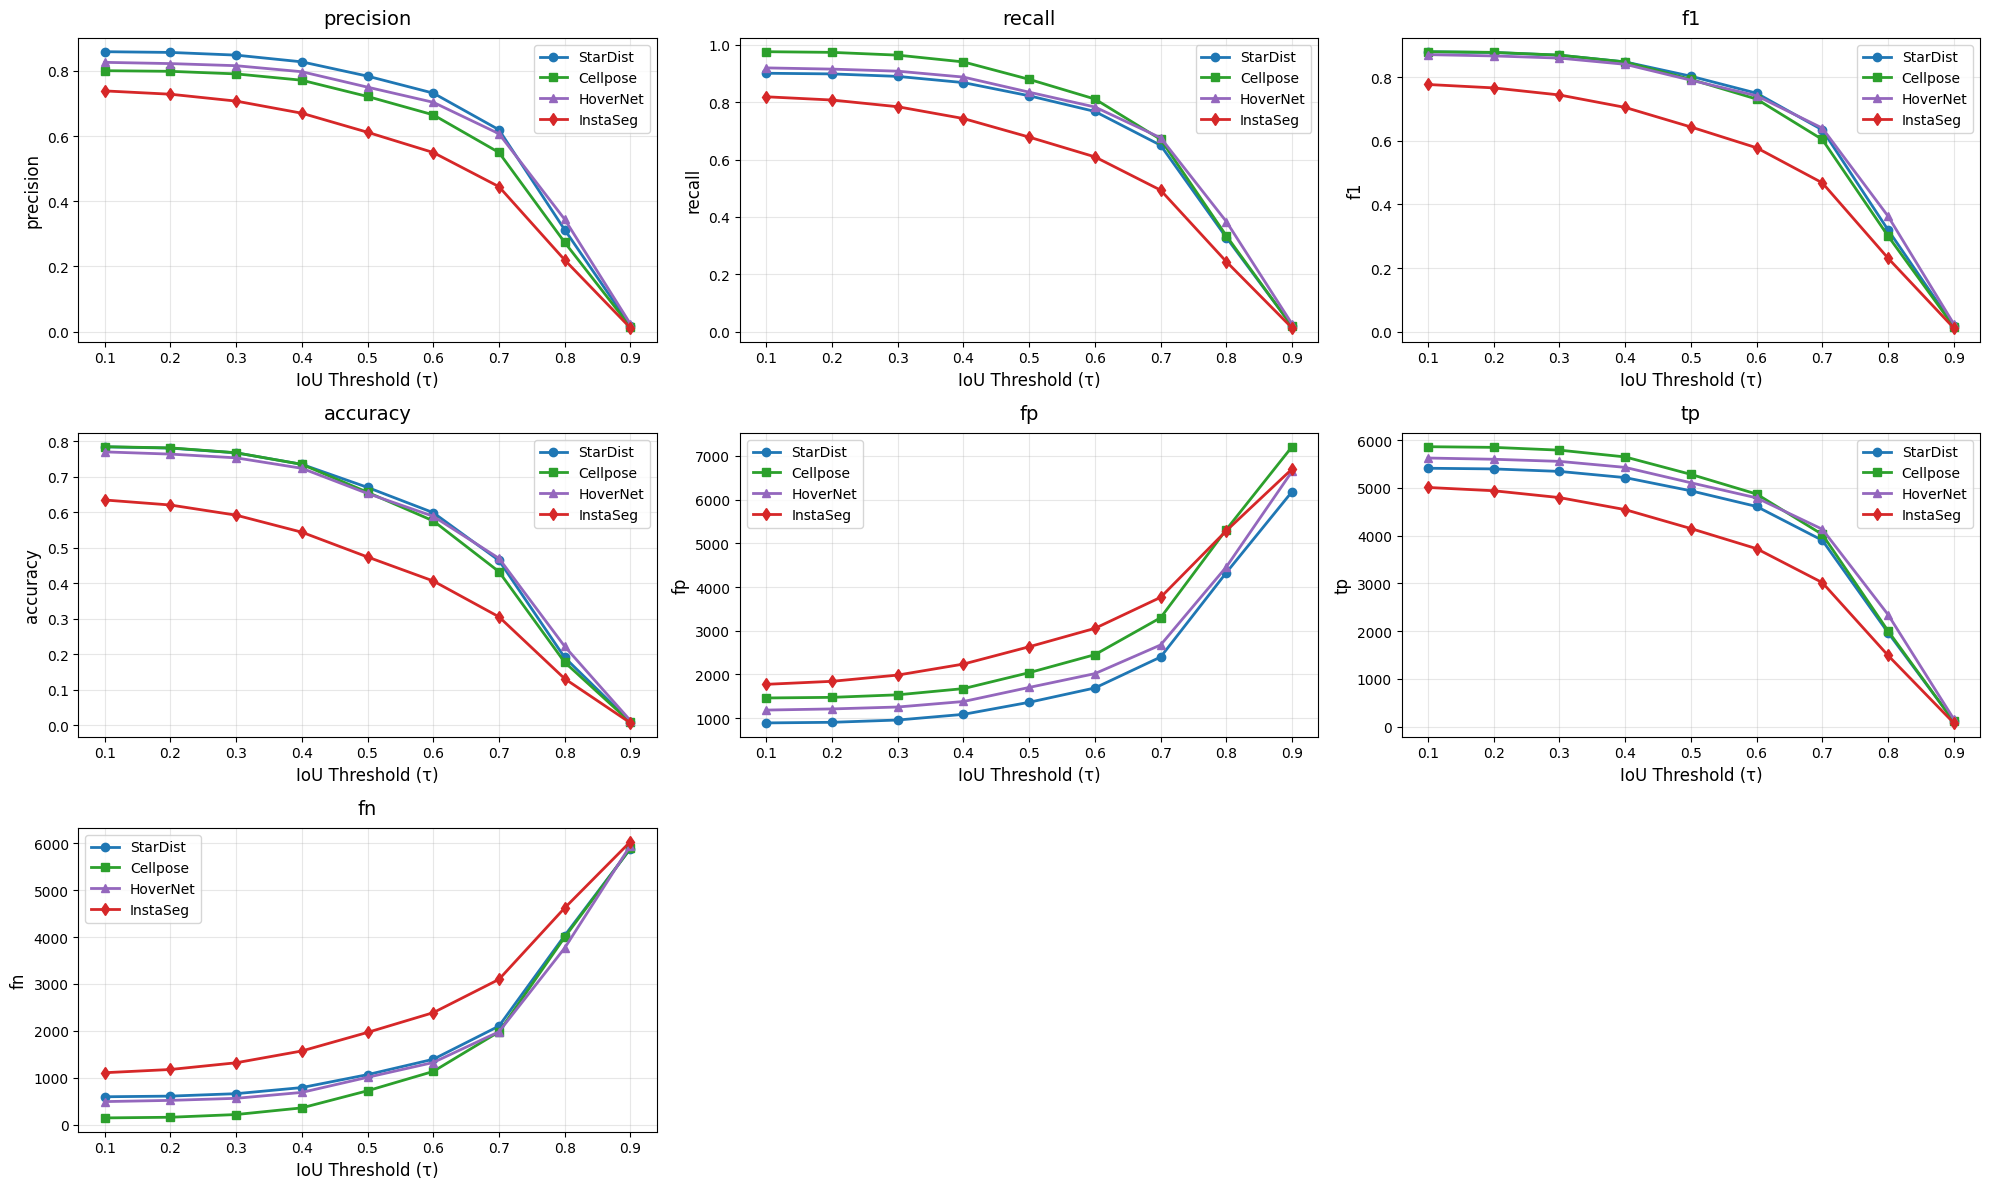

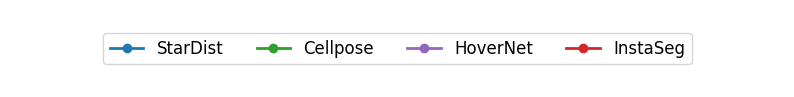

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assume these are already defined:
# metric_names = ['precision', 'recall', 'accuracy', 'f1', 'mean_true_score', 'mean_matched_score', 'panoptic_quality']
# taus, stardist_metrics, cellpose_metrics, hovernet_metrics, instaseg_metrics

# Set style and initialize figure
plt.style.use('default')
fig, axs = plt.subplots(3, 3, figsize=(20, 12))
axs = axs.flatten()

colors = {
    'StarDist': '#1f77b4',
    'Cellpose': '#2ca02c',
    'HoverNet': '#9467bd',
    'InstaSeg': '#d62728'
}

# Plot each metric
for idx, metric_name in enumerate(metric_names):
    ax = axs[idx]
    
    ax.plot(taus, stardist_metrics[idx], marker='o', color=colors['StarDist'], label='StarDist', linewidth=2)
    ax.plot(taus, cellpose_metrics[idx], marker='s', color=colors['Cellpose'], label='Cellpose', linewidth=2)
    ax.plot(taus, hovernet_metrics[idx], marker='^', color=colors['HoverNet'], label='HoverNet', linewidth=2)
    ax.plot(taus, instaseg_metrics[idx], marker='d', color=colors['InstaSeg'], label='InstaSeg', linewidth=2)
    
    ax.set_title(metric_name, fontsize=14, pad=10)
    ax.set_xlabel('IoU Threshold (τ)', fontsize=12)
    ax.set_ylabel(metric_name, fontsize=12)
    ax.grid(True, alpha=0.3)
    ax.legend(fontsize=10)
    ax.set_xticks(taus)
    ax.set_xticklabels([f'{tau:.1f}' for tau in taus])

# Remove any unused subplots
for idx in range(len(metric_names), len(axs)):
    fig.delaxes(axs[idx])

# Save the main figure BEFORE showing
plt.tight_layout()
fig.savefig('metrics_plot_HE.png', dpi=300, bbox_inches='tight')
plt.show()

# Separate legend figure
fig_legend = plt.figure(figsize=(10, 1))
plt.axis('off')
legend_elements = [
    plt.Line2D([0], [0], color=color, label=label, marker='o', linewidth=2)
    for label, color in colors.items()
]
plt.legend(handles=legend_elements, loc='center', ncol=4, fontsize=12)
fig_legend.savefig('metrics_legend.png', dpi=300, bbox_inches='tight')
plt.show()
